In [1]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir
import numpy as np
from matplotlib import pyplot as plt
import sys

In [2]:
current = abspath('')
root_dir = abspath(join(current, pardir))

if not root_dir in sys.path:
    sys.path.append(root_dir)

from utils import safe_mkdir

In [3]:
# root dir
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

## Create new directories for filtered GAIA and 2MASS data

In [4]:
name = "TMASS"
data_tmass_dir = join(root_data_dir, name)
safe_mkdir(data_tmass_dir)

Directory /home2/s20321005/Thesis-Project/Data/TMASS already exist. Good to go!


## 2MASS

This is the filtering criteria is a bit shorter
* $0< J < 13.5$
* $\text{ph\_qual} = \text{A\_A}$
* `use_src` = 1
* `rd_flg` = $\text{1\_1}$
* `rd_flg` = $\text{3\_3}$

In [5]:
# load 2MASS
twomass_files = glob(join(root_data_dir, '2MASS', '*hdf5'))
twomass_files.sort()
twomass_files[:5], len(twomass_files)

(['/home2/s20321005/Thesis-Project/Data/2MASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-004-005.hdf5'],
 360)

In [6]:
twomass_all = vaex.open_many(twomass_files)
twomass_all

#,ra,dec,Jmag,Kmag,designation,ph_qual
0,0.035724,-89.033127,15.052,14.149,00000857-8901592,UCU
1,0.063679,-89.064964,16.05,14.818,00001528-8903538,ABB
2,0.065677,-89.440903,16.832,15.721,00001576-8926272,CCD
3,0.067073,-89.130386,15.453,14.788,00001609-8907493,AAB
4,0.073027,-89.090446,16.496,15.626,00001752-8905256,BCD
...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,23591442+8919272,AAA
"470,994,548",359.823644,89.644913,16.03,15.244,23591767+8938416,ACC
"470,994,549",359.843856,89.67437,15.542,14.9,23592252+8940277,ABB
"470,994,550",359.851795,89.1772,12.139,11.642,23592443+8910379,AAA


In [7]:
# load 2MASS
additonal_files = glob(join(root_data_dir, 'twomass-additional', '*hdf5'))
additonal_files.sort()
additonal_files[:5], len(additonal_files)

(['/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-004-005.hdf5'],
 360)

In [8]:
additonal_all = vaex.open_many(additonal_files)
additonal_all

#,ra,dec,designation,use_src,rd_flg
0,0.000797,-8.907794,00000019-0854280,1,222
1,0.000953,-8.622733,00000022-0837218,1,222
2,0.001211,-8.440763,00000029-0826267,1,222
3,0.001505,-8.803321,00000036-0848119,1,222
4,0.001662,-8.239518,00000039-0814222,1,222
...,...,...,...,...,...
"470,994,547",359.990304,-77.803253,23595767-7748117,1,222
"470,994,548",359.990611,-77.875435,23595774-7752315,1,220
"470,994,549",359.991535,-77.146111,23595796-7708459,1,222
"470,994,550",359.995846,-77.289543,23595900-7717223,1,222


In [34]:
data_tmass_dir

'/home2/s20321005/Thesis-Project/Data/TMASS'

In [14]:
# for every files, filter them
for i, (twomass_file, additonal_file) in enumerate(zip(twomass_files, additonal_files)):
  name = twomass_file.split("/")[-1]
  print(name, i)
  tmass = vaex.open(twomass_file)
  tmass = tmass.to_pandas_df()
  tmass = tmass.drop_duplicates(subset=['designation'])
  tmass = vaex.from_pandas(tmass)
  twomass = vaex.open(additonal_file)
  twomass = twomass.drop(["ra", "dec"])
  # twomass = twomass.to_pandas_df()
  # twomass = twomass.drop_duplicates(subset=['designation'])
  # twomass = vaex.from_pandas(twomass)
  join_table = twomass.join(tmass, on='designation', how='left')
  # join_table = join_table.dropmissing(['use_src'])
  # join_table = join_table.drop(['ph_qual', 'use_src', 'rd_flg'])
  join_table.export(join(data_tmass_dir, name), progress=True)
  # break
join_table

tmass-000-001.hdf5 0
export(hdf5) [########################################] 100.00% elapsed time  :     0.57s =  0.0m =  0.0h
 tmass-001-002.hdf5 1
export(hdf5) [########################################] 100.00% elapsed time  :     0.47s =  0.0m =  0.0h
 tmass-002-003.hdf5 2
export(hdf5) [########################################] 100.00% elapsed time  :     0.48s =  0.0m =  0.0h
 tmass-003-004.hdf5 3
export(hdf5) [########################################] 100.00% elapsed time  :     0.47s =  0.0m =  0.0h
 tmass-004-005.hdf5 4
export(hdf5) [########################################] 100.00% elapsed time  :     0.47s =  0.0m =  0.0h
 tmass-005-006.hdf5 5
export(hdf5) [########################################] 100.00% elapsed time  :     0.46s =  0.0m =  0.0h
 tmass-006-007.hdf5 6
export(hdf5) [########################################] 100.00% elapsed time  :     0.52s =  0.0m =  0.0h
 tmass-007-008.hdf5 7
export(hdf5) [########################################] 100.00% elapsed time  :    

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual
0,23560014-0858102,1,222,359.00062,-8.969504,15.515,14.384,AAA
1,23560019-0831108,1,222,359.000806,-8.519684,16.031,15.267,ABC
2,23560021-0817304,1,222,359.000889,-8.291779,15.296,14.602,AAA
3,23560033-0801470,1,220,359.001399,-8.029726,16.55,16.195,BBU
4,23560117-0834588,1,222,359.004904,-8.583006,12.578,12.199,AAA
...,...,...,...,...,...,...,...,...
"508,987",23595767-7748117,1,222,359.990304,-77.803253,14.923,14.35,AAA
"508,988",23595774-7752315,1,220,359.990611,-77.875435,16.462,15.814,BDU
"508,989",23595796-7708459,1,222,359.991535,-77.146111,16.006,15.113,ABC
"508,990",23595900-7717223,1,222,359.995846,-77.289543,16.413,15.243,BBC


sneak peek

In [15]:
vaex.open_many(glob(join(data_tmass_dir, '*hdf5')))

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual
0,21320005-0846529,1,222,323.00022,-8.781369,11.254,10.789,AAA
1,21320010-0852089,1,222,323.000425,-8.869141,15.937,15.213,ABC
2,21320010-0833494,1,222,323.000447,-8.563746,15.271,15.134,AAB
3,21320013-0846485,1,222,323.000557,-8.780163,14.0,13.6,EAA
4,21320014-0843551,1,222,323.00061,-8.731988,15.147,14.459,AAB
...,...,...,...,...,...,...,...,...
"470,994,547",03475850-7726140,1,222,56.993774,-77.437233,15.096,14.093,AAA
"470,994,548",03475898-7729044,1,222,56.99577,-77.484573,15.675,15.323,AAC
"470,994,549",03475958-7751082,1,222,56.998268,-77.852303,14.105,13.384,AAA
"470,994,550",03475965-7710097,1,222,56.998554,-77.16938,10.377,9.736,AAA


## Gaia

In [4]:
name = "GAIA"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/GAIA already exist. Good to go!


In [17]:
# load Gaia-2MASS
name = "Gaia-2MASS"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-004-005.hdf5'],
 360)

In [18]:
# read Gaia-2MASS into vaex
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.81102679181763,4885.6157,4807.968,5140.507,4.706,4.6177,4.7477,-0.8927,-1.0705,-0.488,990.8027,918.4789,1238.6727,0.5979,0.5382,0.7565,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
"470,994,550",359.851795,89.1772,12.139,

This is the filtering criteria
* $\varpi > 0$
* $\sigma_{\varpi}/\varpi < 0.15$
* $-3 < G_{\text{BP}} - G_{\text{RP}} < 6$
* $3 < G < 21$
* $F_{\text{BP}}/\sigma(F_{\text{BP}}) > 10$
* $F_{\text{RP}}/\sigma(F_{\text{RP}}) > 10$
* $\text{ruwe} < 1.4$
* $1.0+0.015(G_{\text{BP}} - G_{\text{RP}})^2 < E < 1.3+0.06*(G_{\text{BP}} - G_{\text{RP}})^2$
* $0< J < 13.5$
* `use_src` = 1
* $\text{ph\_qual} = \text{A\_A}$ or
* `rd_flg` = $\text{1\_1}$
* `rd_flg` = $\text{3\_3}$


In [19]:
# load 2MASS
additional_files = glob(join(root_data_dir, 'twomass-additional', '*hdf5'))
additional_files.sort()
additional_files[:5], len(additional_files)

(['/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/twomass-additional/tmass-004-005.hdf5'],
 360)

In [20]:
additional_all = vaex.open_many(additional_files)
additional_all

#,ra,dec,designation,use_src,rd_flg
0,0.000797,-8.907794,00000019-0854280,1,222
1,0.000953,-8.622733,00000022-0837218,1,222
2,0.001211,-8.440763,00000029-0826267,1,222
3,0.001505,-8.803321,00000036-0848119,1,222
4,0.001662,-8.239518,00000039-0814222,1,222
...,...,...,...,...,...
"470,994,547",359.990304,-77.803253,23595767-7748117,1,222
"470,994,548",359.990611,-77.875435,23595774-7752315,1,220
"470,994,549",359.991535,-77.146111,23595796-7708459,1,222
"470,994,550",359.995846,-77.289543,23595900-7717223,1,222


In [21]:
data_dir

'/home2/s20321005/Thesis-Project/Data/GAIA'

In [26]:
# # for every files, filter them
# for gaia_file, additional_file in zip(gaia_files[309:], additional_files[309:]):
#   name = gaia_file.split("/")[-1]
#   print(name)
#   gaia = vaex.open(gaia_file)
#   # tmass = tmass.to_pandas_df()
#   # tmass = tmass.drop_duplicates(subset=['designation'])
#   # tmass = vaex.from_pandas(tmass)
#   add = vaex.open(additional_file)
#   add = add.drop(["ra", "dec"])
#   add = add.to_pandas_df()
#   add = add.drop_duplicates(subset=['designation'])
#   add = vaex.from_pandas(add)
#   join_table = add.join(gaia, on='designation', how='right')
#   # join_table = join_table.dropmissing(['use_src'])
#   # join_table = join_table.drop(['ph_qual', 'use_src', 'rd_flg'])
#   # join_table.export(join(data_dir, name), progress=True)
#   break
# join_table

In [38]:
# for every files, filter them
for gaia_file, tmass_file in zip(gaia_files, twomass_files):
  name = gaia_file.split("/")[-1]
  print(name)
  gaia = vaex.open(gaia_file)
  gaia["id"] = gaia.apply(lambda x, y,z: str(x)+str(y)+str(z), arguments=[gaia["ra"], gaia["dec"], gaia['ph_qual']])
  # gaia = gaia.to_pandas_df()
  # gaia = gaia.drop_duplicates(subset=['id'])
  # gaia = vaex.from_pandas(gaia)
  print("\tgaia: ", len(gaia))
  twomass = vaex.open(tmass_file)
  twomass["id"] = twomass.apply(lambda x, y, z: str(x)+str(y)+str(z), arguments=[twomass["ra"], twomass["dec"], twomass["ph_qual"]])
  twomass = twomass.drop(["ra", "dec", "Jmag",	"Kmag",	"ph_qual"])
  twomass = twomass.to_pandas_df()
  twomass = twomass.drop_duplicates(subset=['id'])
  twomass = vaex.from_pandas(twomass)
  print("\t2mass: ", len(twomass))
  print("\diff: ", len(gaia)-len(twomass))
  join_table = twomass.join(gaia, on='id', how='right')
  join_table = join_table.drop(['id'])
  # join_table = join_table.dropmissing(['designation'])
  if len(join_table) == 0:
    print("\tempty")
    continue
  else:
    print("\texport", name)
    join_table.export(join(data_dir, name), progress=True)
  # break
join_table

gaia-000-001.hdf5
	gaia:  505425
	2mass:  505424
\diff:  1
	export gaia-000-001.hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     1.03s =  0.0m =  0.0h 
 gaia-001-002.hdf5
	gaia:  492475
	2mass:  492472
\diff:  3
	export gaia-001-002.hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.97s =  0.0m =  0.0h
 gaia-002-003.hdf5
	gaia:  496622
	2mass:  496622
\diff:  0
	export gaia-002-003.hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     1.01s =  0.0m =  0.0h
 gaia-003-004.hdf5
	gaia:  494551
	2mass:  494551
\diff:  0
	export gaia-003-004.hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     1.02s =  0.0m =  0.0h
 gaia-004-005.hdf5
	gaia:  486675
	2mass:  486674
\diff:  1
	export gaia-004-005.hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     1.01s =  0.0m =  0.0h
 gaia-005-006.hdf5
	gaia:  484417
	2mass

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,359.028561,-89.014442,16.008,14.999,AAB,6341218393034679680,4.509433,0.07283657468135563,0.20856856,-4.508844300875404,0.162229,0.9800847056783352,0.13763157,18.574583,19.77,17.4858,22.88366,80.037636,1.0063521,1.3885841,nan,nan,303.1989885953919,-28.085007649343904,3556.566,3510.507,3587.5908,4.613,4.4622,4.6917,-1.025,-1.1433,-0.8859,532.1466,441.1597,645.0597,0.4306,0.3796,0.4683,nan,nan,nan,nan,nan,nan,nan,nan,nan,,23560685-8900519,1,222
1,359.150086,-89.431862,16.468,15.649,BBD,6341112290163237120,8.562415,-3.320038947089477,0.16536488,-7.892547247699226,0.1689044,0.7021577711965485,0.14742595,18.868677,20.00122,17.843584,17.19923,77.74968,0.9837564,1.3375891,nan,nan,303.08396445688555,-27.679970708165854,3564.4766,3548.303,3609.3328,4.6118,4.5564,4.6923,-0.661,-0.7374,-0.5178,828.4031,752.7248,883.0055,0.3129,0.2732,0.3524,nan,nan,nan,nan,nan,nan,nan,nan,nan,,23563602-8925547,1,222
2,359.197673,-89.474236,12.984,12.515,AAA,6341106247145864192,2.1637506,-0.28364569025185976,0.015046449,2.1450785714295253,0.015701974,1.0190951201688359,0.01371227,14.296198,14.72302,13.696558,700.1737,699.5137,1.0162401,1.22074,8.857942,6.204644,303.0720608225402,-27.639054940686016,5768.1924,5746.9077,5781.7803,4.0546,4.0386,4.0687,-0.3619,-0.3787,-0.348,992.042,976.018,1007.1816,0.4224,0.4129,0.4283,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23564744-8928272,1,222
3,359.199631,-89.019226,16.853,14.787,CCB,6341218393034675712,0.33240026,-0.02304944791582746,0.36363852,-0.33160015008990845,0.2732416,0.05312522121482276,0.23304491,19.194618,19.26734,18.031525,30.699467,46.14824,1.0554242,1.9069458,nan,nan,303.19449707063177,-28.081046232422693,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,23564791-8901092,1,222
4,359.229846,-89.318352,13.644,13.207,AAA,6341114630921992832,13.745083,13.739507117103132,0.020745363,0.3914805154041892,0.021710137,0.8886862697363416,0.019287065,15.033925,15.485332,14.420223,747.2271,1099.8868,0.9894765,1.2193137,nan,nan,303.11342508105224,-27.790569163117198,5377.868,5353.698,5401.743,4.3434,4.3308,4.3555,0.1479,0.1254,0.1768,1060.622,1038.4675,1085.7859,0.2776,0.2634,0.2908,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23565516-8919060,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"508,987",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,23591442+8919272,1,222
"508,988",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,,23591767+8938416,1,222

# Inspect

In [5]:
# load the filtered data Gaia-2MASS
gaia_files = glob(join(data_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/GAIA/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-004-005.hdf5'],
 360)

In [6]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,00000857-8901592,0,020
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,,00001528-8903538,1,222
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,00001576-8926272,0,222
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown,00001609-8907493,1,222
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,00001752-8905256,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,23591442+8919272,1,222
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,,23591767+8938416,1,222
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.8110267918176

In [10]:
# check for local neighborhood
gaia_filt = gaia.filter("1000/parallax < 100").filter("parallax > 0")
gaia_filt = gaia_filt.extract()
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,32.419907,1.021693,303.8348243897451,-30.70014661878395,3918.3796,3912.4084,3927.0107,4.7637,4.7592,4.7742,-0.4165,-0.4555,-0.3767,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,-0.26,-0.4,-0.08,0.08,0.03,0.15,nan,nan,nan,M,00022474-8620303,1,222
1,0.936292,-84.796806,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,16.008062,1.5245097,304.2016787610492,-32.21349559526843,3156.3877,3156.1277,3156.7202,4.9963,4.996,4.9971,-0.0763,-0.0775,-0.0752,29.8859,29.8674,29.9026,0.0,0.0,1e-04,-0.92,-1.18,-0.69,-0.08,-0.18,0.02,nan,nan,nan,M,00034471-8447485,1,222
2,0.448616,-83.724159,12.582,11.798,AAA,4629771197998134272,18.000162,-14.670109664867741,0.0345098,-10.43042397176091,0.035302754,11.056565646210736,0.026997682,15.420678,16.949064,14.220465,169.2352,966.02747,1.1136128,1.448909,-0.49444312,4.325622,304.5417658937672,-33.248099542911426,3356.3682,3355.2205,3357.6177,4.8975,4.8957,4.9,-0.0753,-0.0789,-0.0721,91.6812,91.4604,91.8945,0.4069,0.4026,0.4111,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,00014766-8343269,1,222
3,0.800939,-81.926468,13.752,12.808,AUU,4630919710908009472,139.87119,126.78981652336644,0.06318063,-59.06174156169415,0.06651391,11.167492545100924,0.05503064,16.913626,18.841755,15.613965,51.53213,357.38617,1.0543059,1.5162046,nan,nan,304.98406581363366,-35.00849023159412,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,00031222-8155352,1,266
4,0.40747,-80.322624,9.639,8.746,EAE,4634490340559664256,328.70984,316.13408896968303,0.018635297,90.05214258434518,0.020490061,25.372552655104613,0.015986383,12.345585,13.659766,11.196317,493.27243,479.14673,1.3604125,1.4293334,-13.911054,0.35579967,305.5165243514473,-36.55499459308642,3197.342,3180.4624,3343.9026,4.0861,4.0504,4.4033,-0.7659,-0.7973,-0.4158,39.5581,39.318,40.2739,0.0513,0.0038,0.1705,-0.57,-0.66,-0.46,0.08,0.03,0.13,nan,nan,nan,M,00013779-8019214,0,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"289,773",359.73357,80.04612,8.621,8.134,AAA,2282972656257612416,89.52657,76.42611617633081,0.012816159,46.626766942308144,0.0112089235,11.375723135891688,0.011159461,9.867241,10.221068,9.291675,1263.0762,442.4544,0.97852784,1.2387439,nan,nan,120.57453833034958,17.415714607847306,5308.893,5306.8096,5313.2227,4.4073,4.4064,4.4086,-0.5135,-0.5211,-0.5017,87.7614,87.6671,87.8467,0.0012,0.0002,0.0036,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23585605+8002460,1,111
"289,774",359.020764,81.901581,13.856,12.926,AAA,2286608500691913344,48.0266,47.68859460629561,0.115039855,5.687913586619781,0.09983932,10.879836164379652,0.08021352,17.4592,19.677631,16.05783,16.859097,269.8439,1.0292798,1.6242328,nan,nan,120.88674640024387,19.250555794417522,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,23560498+8154056,1,222
"289,775",359.4141

In [11]:
# convert into radian
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180

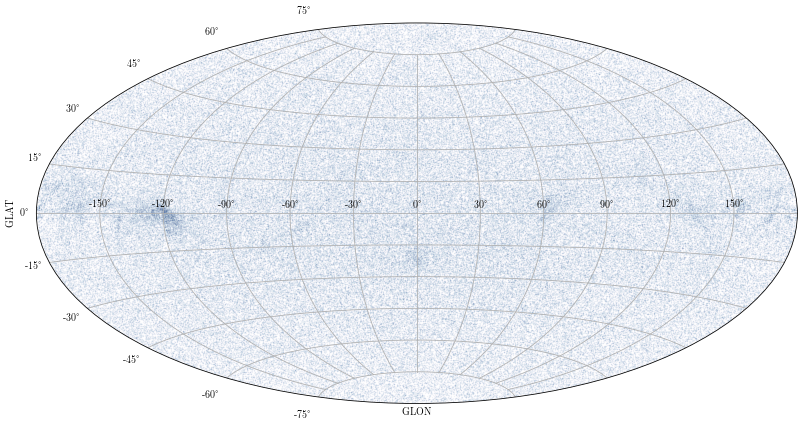

In [12]:
# see the distribution, if nothing is wrong, we can proceed
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=0.1)
plt.grid(True)
plt.show()

Convert into healpix

In [13]:
gaia_s = gaia.copy()

In [14]:
gaia_s["GLAT"] = np.pi/2 - gaia["GLAT"]*np.pi/180
gaia_s["GLON"] = gaia["GLON"]*np.pi/180 #- np.pi

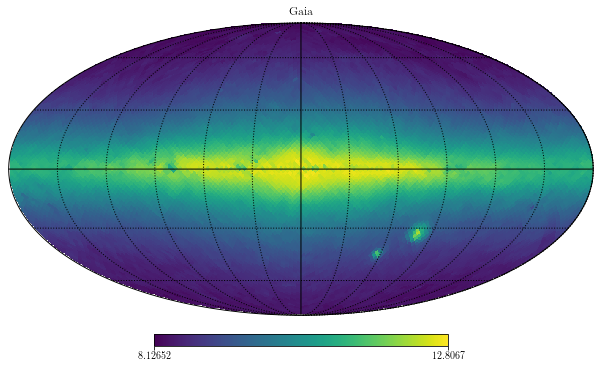

In [15]:
# from glon and glat, convert into healpix index
import healpy as hp

gaia_s = gaia_s.filter("GLAT > 0").filter("GLAT < 3.141592653589793")
gaia_s = gaia_s.extract()

N = 5
nside = 2**N
index = hp.ang2pix(nside, gaia_s["GLAT"].to_numpy(), gaia_s["GLON"].to_numpy())
gaia_s["index"] = index
# # group by index
gaia_group = gaia_s.groupby("index", agg="count").sort("index", ascending=True)
m = np.log(gaia_group['count'].to_numpy())
# # # plot
hp.mollview(m, title="Gaia")
hp.graticule()


2mass

In [82]:
len(gaia_group)

12288

In [45]:
tmass_files = glob(join(data_tmass_dir, "*.hdf5"))
tmass_files.sort()
tmass_files[:5], len(tmass_files)

(['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5'],
 360)

In [46]:
tmass = vaex.open_many(tmass_files)
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA
...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA


In [52]:
# convert ra dec to galaxy coordinate using astropy
from astropy.coordinates import SkyCoord
from astropy import units as u

s = SkyCoord(ra=tmass["ra"].to_numpy()*u.degree, dec=tmass["dec"].to_numpy()*u.degree, frame='icrs')

tmass["GLON"] = s.galactic.l.value
tmass["GLAT"] = s.galactic.b.value
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual,GLON,GLAT
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA,303.11965887601536,-27.865853409339252
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA,303.05892508502853,-27.634818844001632
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA,303.1060625482833,-27.824748772457056
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA,303.0952655830097,-27.787151541057337
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA,303.2763741966109,-28.469540172350367
...,...,...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA,122.5183839585538,25.55935523626105
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA,122.46770040344013,25.331878064327828
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA,122.67652076749864,26.139535612604043
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA,122.50883749261115,25.466252962471767


In [54]:
N = 6
nside = 2**N
index = hp.ang2pix(nside, tmass["GLON"].to_numpy(), tmass["GLAT"].to_numpy(), lonlat=True)
tmass["index"] = index

# group by index
tmass_group = tmass.groupby("index", agg="count").sort("index", ascending=True)

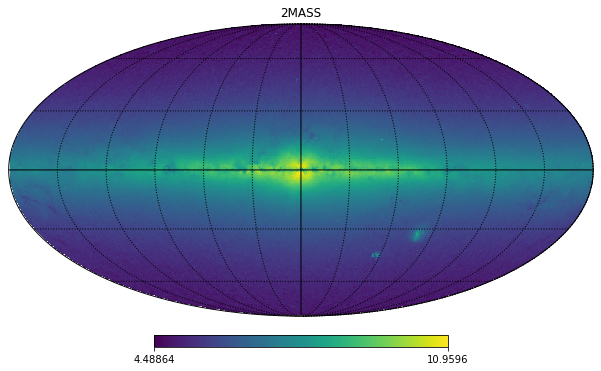

In [55]:
m = np.log(tmass_group['count'].to_numpy())
# # plot
hp.mollview(m, title="2MASS")
hp.graticule()